### This is an example on an ad hoc analysis done few months ago on TGP backhaul ###

The answer we are to answer here is **where is all the backhaul on TGP going? Can we find the potential price impact?**

First, import all relevant libraries and set up database connections:

In [5]:
import numpy as np
import pyodbc
from sqlalchemy import create_engine
import pandas as pd
import MySQLdb
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
genscapeserver = pyodbc.connect('DSN=bh9g7lf49q.database.windows.net;UID=ObservCommodities;PWD=rf4U2Tdp')       

Then we set up a few functions to make pulling pipeline flow data easier.

In [3]:
        df3=pd.read_sql(sql3, genscapeserver)
        genscapeserver.close()

NameError: name 'sql3' is not defined

In [4]:
## Look up net receipts of a specific pipeline by state
def net_flow_of_points(date_input, list_input):
    """ list_input = list of location id's
        output: dataframe with date and daily flow in mmbtu
 
   """
    liststring = "("+str(list_input).strip('[]')+")"
    datestring = "'"+date_input +"'"
    
    sql3 = ("Select gas_day as date , l.loc_name, sum(scheduled_cap*lr.sign) as value "
            "from natgas.location_extended l "
            "inner join natgas.location_role lr "
            "on lr.location_id = l.location_id "
            "inner join natgas.nominations noms  "
            "on noms.location_role_id = lr.location_role_id "
            "where lr.role_code in ('D', 'R', 'X', 'W') "
            " AND noms.gas_day > "+datestring+
            " AND l.location_id in "+liststring+
            " group by gas_day , l.loc_name"
            " order by gas_day ")
    try:
        genscapeserver = pyodbc.connect('DSN=bh9g7lf49q.database.windows.net;UID=ObservCommodities;PWD=rf4U2Tdp')
        df3=pd.read_sql(sql3, genscapeserver)
        genscapeserver.close()
    except:
        df3 =None
    return df3

In [6]:
## Look up net receipts of a specific pipeline by state
def utilization_points(date_input, list_input):
    """ list_input = list of location id's
        output: dataframe with date and daily flow in mmbtu
 
   """
    liststring = "("+str(list_input).strip('[]')+")"
    datestring = "'"+date_input +"'"
    
    sql3 = ("Select gas_day as date , l.loc_name, sum(scheduled_cap*lr.sign) as value, max(design_cap) as design_capacity "
            "from natgas.location_extended l "
            "inner join natgas.location_role lr "
            "on lr.location_id = l.location_id "
            "inner join natgas.nominations noms  "
            "on noms.location_role_id = lr.location_role_id "
            "where lr.role_code in ('D', 'R', 'X', 'W') "
            " AND noms.gas_day > "+datestring+
            " AND l.location_id in "+liststring+
            " GROUP BY gas_day, l.loc_name"
            " order by l.loc_name ")
    try:
        genscapeserver = pyodbc.connect('DSN=bh9g7lf49q.database.windows.net;UID=ObservCommodities;PWD=rf4U2Tdp')
        df3=pd.read_sql(sql3, genscapeserver)
        genscapeserver.close()
        df3['utilization'] = df3['value'].abs()/df3['design_capacity']
        df4 = df3.ix[:,['date','loc_name','utilization']]
    except:
        df4 =None
    return df3

In [ ]:
## Look up capacity of the points
def point_capacities(date_input, list_input):
    """ list_input = list of location id's
        output: dataframe with date and daily flow in mmbtu
 
   """
    liststring = "("+str(list_input).strip('[]')+")"
    datestring = "'"+date_input +"'"

In [5]:
date_input = '2015-01-01'
list_input = location

NameError: name 'location' is not defined

In [322]:
    sql3 = ("Select l.loc_name, max(scheduled_cap*lr.sign) as operating_Cap, max(design_cap) as design_capacity "
            "from natgas.location_extended l "
            "inner join natgas.location_role lr "
            "on lr.location_id = l.location_id "
            "inner join natgas.nominations noms  "
            "on noms.location_role_id = lr.location_role_id "
            "where lr.role_code in ('D', 'R', 'X', 'W') "
            " AND noms.gas_day > "+datestring+
            " AND l.location_id in "+liststring+
            " GROUP BY l.loc_name"
            " order by l.loc_name ")

In [319]:
    try:

IndentationError: expected an indented block (<ipython-input-319-80406510a26c>, line 13)

In [324]:
df3

,loc_name,operating_Cap,design_capacity
0,EAST LOBELVILLE TENNESSEE (75 3201),-10353,538476
1,GREENBRIER TENNESSEE 2 (Dual 753101),-106079,671252
2,HEIDELBERG MISS,0,387082
3,MGT PURCHASE (Bi 2 0852 Dual 2 7086),0,2059130
4,ROSE HILL MISS,0,1351804


In [311]:
        df3['utilization'] = df3['value'].abs()/df3['design_capacity']
        df4 = df3.ix[:,['date','loc_name','utilization']]
    except:
        df4 =None
    return df4

In [9]:
df2 = utilization_points('2014-01-01',location)

In [336]:
df2.pivot_table(index = 'loc_name', values = 'design_capacity', aggfunc=[np.median])

,median
loc_name,
EAST LOBELVILLE TENNESSEE (75 3201),269238
GREENBRIER TENNESSEE 2 (Dual 753101),335626
HEIDELBERG MISS,193541
MGT PURCHASE (Bi 2 0852 Dual 2 7086),1029565
ROSE HILL MISS,675902


In [5]:
## Look up net receipts of a specific pipeline by state
def net_flow_of_points_by_pipe(date_input, list_input):
    """ list_input = list of location id's
        output: dataframe with date and daily flow in mmbtu
 
   """
    liststring = "("+str(list_input).strip('[]')+")"
    datestring = "'"+date_input +"'"
    
    sql3 = ("Select gas_day as date , l.interconnecting_entity, sum(scheduled_cap*lr.sign) as value "
            "from natgas.location_extended l "
            "inner join natgas.location_role lr "
            "on lr.location_id = l.location_id "
            "inner join natgas.nominations noms  "
            "on noms.location_role_id = lr.location_role_id "
            "where lr.role_code in ('D', 'R', 'X', 'W') "
            " AND noms.gas_day > "+datestring+
            " AND l.location_id in "+liststring+
            " group by gas_day , l.interconnecting_entity"
            " order by gas_day ")
    try:
        genscapeserver = pyodbc.connect('DSN=bh9g7lf49q.database.windows.net;UID=ObservCommodities;PWD=rf4U2Tdp')
        df3=pd.read_sql(sql3, genscapeserver)
        genscapeserver.close()
    except:
        df3 =None
    return df3

In [7]:
 ## Look up net receipts of a specific pipeline by state
def net_flow_TGP_southeast_other_ip(date_input, list_input):
    """ list_input = list of location id's
        output: dataframe with date and daily flow in mmbtu
 
   """
    liststring = "("+str(list_input).strip('[]')+")"
    datestring = "'"+date_input +"'"
    
    sql3 = ("Select gas_day as date , l.interconnecting_entity, sum(scheduled_cap*lr.sign) as value "
            "from natgas.location_extended l "
            "inner join natgas.location_role lr "
            "on lr.location_id = l.location_id "
            "inner join natgas.nominations noms  "
            "on noms.location_role_id = lr.location_role_id "
            "where lr.role_code in ('D', 'R', 'X', 'W') "
            " AND l.state in ('Mississippi','Tennessee')"
            " AND l.pipeline_id = 461"
            " AND noms.gas_day > "+datestring+
            " AND l.location_id NOT in "+liststring+
            " group by gas_day , l.interconnecting_entity"
            " order by gas_day ")
    try:
        genscapeserver = pyodbc.connect('DSN=bh9g7lf49q.database.windows.net;UID=ObservCommodities;PWD=rf4U2Tdp')
        df3=pd.read_sql(sql3, genscapeserver)
        genscapeserver.close()
    except:
        df3 =None
    return df3

In [8]:
 ## Look up net receipts of a specific pipeline by state
def net_flow_TGP_southeast_demand(date_input, list_input):
    """ list_input = list of location id's
        output: dataframe with date and daily flow in mmbtu
 
   """
    liststring = "("+str(list_input).strip('[]')+")"
    datestring = "'"+date_input +"'"
    
    sql3 = ("Select gas_day as date , 'Demand' as title, sum(scheduled_cap*lr.sign) as value "
            "from natgas.location_extended l "
            "inner join natgas.location_role lr "
            "on lr.location_id = l.location_id "
            "inner join natgas.nominations noms  "
            "on noms.location_role_id = lr.location_role_id "
            "where lr.role_code = 'D' "
            " AND l.state in ('Mississippi','Tennessee')"
            " AND l.pipeline_id = 461"
            " AND l.facility in ('POWER PLANT','CITYGATE','INTERSTATE INTERCONNECT','END USER','INTRASTATE INTERCONNECT')"
            " AND noms.gas_day > "+datestring+
            " AND l.location_id NOT in "+liststring+
            " group by gas_day  "
            " order by gas_day ")
    try:
        genscapeserver = pyodbc.connect('DSN=bh9g7lf49q.database.windows.net;UID=ObservCommodities;PWD=rf4U2Tdp')
        df3=pd.read_sql(sql3, genscapeserver)
        genscapeserver.close()
    except:
        df3 =None
    return df3

In [9]:
 ## Look up net receipts of a specific pipeline by state
def net_flow_TGP_southeast_other_ic(date_input, list_input):
    """ list_input = list of location id's
        output: dataframe with date and daily flow in mmbtu
 
   """
    liststring = "("+str(list_input).strip('[]')+")"
    datestring = "'"+date_input +"'"
    
    sql3 = ("Select gas_day as date , 'Other Interconnects' as title, sum(scheduled_cap*lr.sign) as value "
            "from natgas.location_extended l "
            "inner join natgas.location_role lr "
            "on lr.location_id = l.location_id "
            "inner join natgas.nominations noms  "
            "on noms.location_role_id = lr.location_role_id "
            "where lr.role_code = 'D' "
            " AND l.state in ('Mississippi','Tennessee')"
            " AND l.pipeline_id = 461"
            " AND l.facility in ('INTERSTATE INTERCONNECT','INTRASTATE INTERCONNECT')"
            " AND noms.gas_day > "+datestring+
            " AND l.location_id NOT in "+liststring+
            " group by gas_day "
            " order by gas_day ")
    try:
        genscapeserver = pyodbc.connect('DSN=bh9g7lf49q.database.windows.net;UID=ObservCommodities;PWD=rf4U2Tdp')
        df3=pd.read_sql(sql3, genscapeserver)
        genscapeserver.close()
    except:
        df3 =None
    return df3

In [8]:
location = [62431,61617,60959,62298,62155]

In [7]:
df = net_flow_of_points('2014-01-01',location)

In [177]:
df2 = utilization_points('2014-01-01',location)

In [312]:
df22 = point_capacities('2014-01-01',location)

In [313]:
df22

In [12]:
df_by_pipe = net_flow_of_points_by_pipe('2014-01-01',location)

In [13]:
df_other_ic = net_flow_TGP_southeast_other_ic('2014-01-01',location)
df_other_ic.columns = ('date','interconnecting_entity', 'value')

In [14]:
df_demand = net_flow_TGP_southeast_demand('2014-01-01',location)
df_demand.columns = ('date','interconnecting_entity', 'value')

In [194]:
##df_other_by_ip = net_flow_TGP_southeast_other_ip('2014-01-01',location)

In [15]:
df_all_pipes = df_by_pipe.append(df_demand).append(df_other_ic)

A portion of Marcellus natural gas production is carried into the southeast via TGP's backhaul service. In this post, we explore how the gas molecules are carried into the southeast.

Step:1
Go on [TGP's informational postings](http://pipeline2.kindermorgan.com/Documents/PDFView.aspx?code=TGP&fname=TGP_EntireTariff.pdf&pdftag=cerfftbh) to figure out the tariff rates for backhaul service. According to the rates effective April 1, 2015, here are the effective rates for FT-BH from zone 4 to zone 1
Daily reservation charge:
Daily commodity charge:


There are several parts of transport cost
1. Reservation charge
2. Commodity charge
3. ACA
4. Fuel and loss retention percentages (F&LR)
5. Electric power costs rates (EPCR)

To flow gas from zone 4 (Marcellus) to zone 1 (Tennessee/Missisippi), the rates are:

1. Monthly Base Reservation charge: \$ 9.5641//dth
2. Base Commodity charge: \$ 0.1777/dth 
3. ACA: \$ 0.0014/dth
4. Fuel and loss retention percentages (F&LR): 1.65%
5. Electric power costs rates (EPCR): \$ 0.0340/dth

This means if a unit of gas cost \$2/mmbtu at receipt point, for a shipper with FT-BH capacity subscription, the variable cost would be:

Note all the calculation assume the heat content conversion is 1 mmbtu = 1dth

\$ (2.00 + 0.1777 + 0.0014 + 0.0340)/( 1 - 1.65%) = $2.250/mmbtu

After the gas gets to the southeast on TGP, gas needs to get on either SoNat, Transco, or East Tennessee to get to the consumers to get into the southeast or get on Midwestern to get to Chicago. How much does the second segment cost?/

Scenerio when gas flow onto TGP
-----------------------------
The interconeect between Transco and TGP is Heidelberg in Missisippi

In [11]:
%matplotlib inline
sns.set_style("dark")
sns.set_palette("Paired")
plt.figure(figsize=(10,10))

In [43]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 8, 5.5  # that's default image size for this interactive session

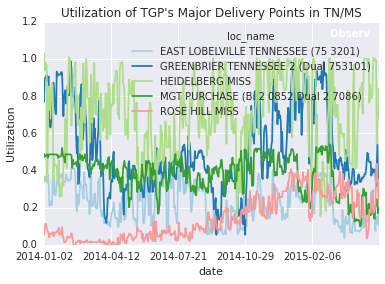

In [28]:
df2.pivot(index = 'date', columns = 'loc_name', values = 'utilization').plot(title = "Utilization of TGP's Major Delivery Points in TN/MS")
#plt.gca().invert_yaxis()
plt.gca().set_ylabel('Utilization')
plt.figtext(0.88, 0.85, 'Observ ', horizontalalignment='right', color = 'white', fontweight='bold') 
plt.savefig('/Users/wei/Dropbox/Observ/Blog/TGP_major_points_utilization.png')

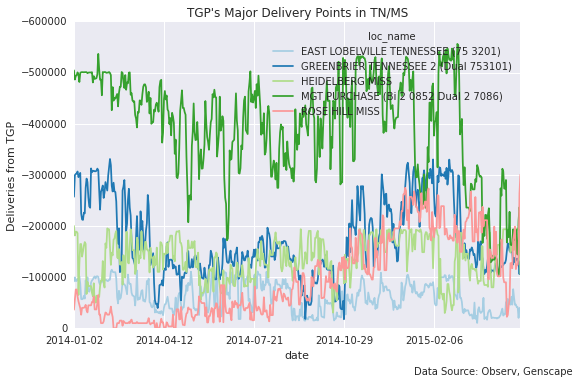

In [44]:
df.pivot(index = 'date', columns = 'loc_name', values = 'value').plot(title = "TGP's Major Delivery Points in TN/MS")
plt.gca().invert_yaxis()
plt.gca().set_ylabel('Deliveries from TGP')
plt.figtext(0.99, 0.01, 'Data Source: Observ, Genscape', horizontalalignment='right') 
plt.savefig('/Users/wei/Dropbox/Observ/Blog/TGP_major_points.png')

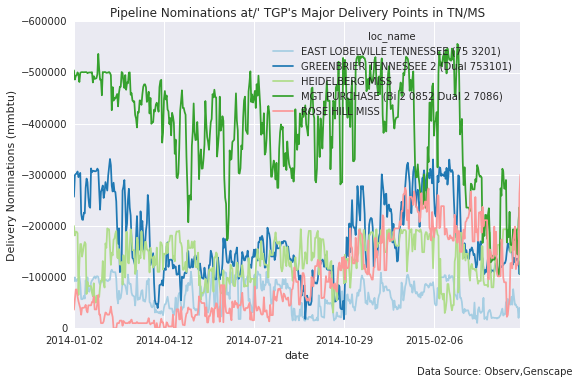

In [45]:
df.pivot(index = 'date', columns = 'loc_name', values = 'value').plot(title = "Pipeline Nominations at/' TGP's Major Delivery Points in TN/MS")
plt.gca().invert_yaxis()
plt.gca().set_ylabel('Delivery Nominations (mmbtu)')
plt.figtext(0.99, 0.01, 'Data Source: Observ,Genscape', horizontalalignment='right') 
plt.savefig('/Users/wei/Dropbox/Observ/Blog/TGP_major_points_flow.png')

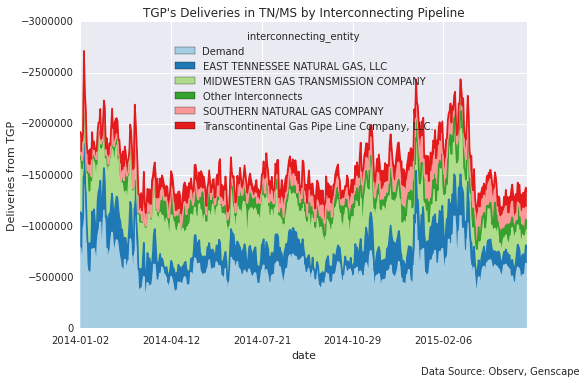

In [183]:
df_all_pipes.pivot( index = 'date', columns = 'interconnecting_entity', values = 'value').plot(kind='area', title = "TGP's Deliveries in TN/MS by Interconnecting Pipeline")
plt.gca().invert_yaxis()
plt.gca().set_ylabel('Deliveries from TGP')
plt.figtext(0.99, 0.01, 'Data Source: Observ, Genscape', horizontalalignment='right') 
plt.savefig('/Users/wei/Dropbox/Observ/Blog/TGP_interconnecting.png')

Currently, supply from the fulg flow as far north as North Carolina before getting pushed back by Marcellus production
Thus, we are going to assume once the gas flow off from TGP, it only made to North Carolina, and that would be flowing gas from zone 4 to zone 5

We went on [Transco's website](http://www.1line.williams.com/Transco/files/Tariff/TranscoTariff.pdf?#nameddest=PartIIRates&pagemode=bookmarks) o on TGP's informational postings to figure out the tariff rates for backhaul service. According to the rates effective April 1, 2015, here are the effective rates for FT from zone 4 to zone 5

1. Daily Reservation charge:  \$ 0.34837/dth
2. Base Commodity charge (including Electric Power rate): \$ 0.02375/dth
3. ACA: \$ 0.0014/dth
4. Fuel and loss retention percentages (F&LR): 1.76%


(\$(2.250+ 0.025)/mmbtu) / (1- 1.76%) = $2.316/mmbtu

Scenerio when gas flow onto Southern Natural
-----------------------------
The interconeect between SONAT and TGP is ROSE HILL MISS in Clarke county in Missisippi

SONAT flows gas from zone 1 to zone 2 and zone 3

From zone 1 to zone 2
1. Monthly Reservation charge: \$ 6.45/dth + \$ 9.65/dth
2. Daily Commodity charge (including Electric Power rate): \$ 0.043/dth
3. ACA: \$ 0.0014/dth
4. Fuel and loss retention percentages (F&LR): 1. 74%+ 2.10%

From zone 1 to zone 3
1. Monthly Reservation charge: \$ 6.45/dth + \$ 9.65/dth + $12.77/dth
2. Daily Commodity charge (including Electric Power rate): \$ 0.051/dth
3. ACA: \$ 0.0014/dth
4. Fuel and loss retention percentages:  1. 74% +2.10%+ 2.59%

Scenerio when gas flow onto East Tennessee
-----------------------------
The interconeect between East Tennessee and TGP is GREENBRIER TENNESSEE 2  and EAST LOBELVILLE TENNESSEE  in Tennessee

For East Tenn to flow the gas to 

1. Monthly Reservation charge: \$ 6.68/dth
2. Daily Commodity charge : \$ 0.0011/dth
3. ACA: \$ 0.0014/dth
4. Fuel and loss retention percentages (F&LR): 1.58%(Summer)  2.22% (winter)

In [38]:
# Pull Path Table
server = "eia.cwvrtrnm3ga3.us-west-2.rds.amazonaws.com"
db = MySQLdb.connect(server,"observ","forecast123","forecastdev" )

query_path_multiple_segment = ("SELECT t1.path_id as path_id1, t2.path_id as path_id2, t1.rec_price_id,  t2.del_price_id,"
        " t1.rec_group,  t2.del_group,"
        " t1.genscape_pipe_id as pipeline1, t2.genscape_pipe_id as pipeline2, "
        " t1.pipe_name as pipe_name1, t2.pipe_name as pipe_name2, "
        " t1.flow_query as flow_query1, t2.flow_query as flow_query2,"
        " t1.flow_query_list as list1, t2.flow_query_list as list2"
        " FROM transportdev.path t1"
        " JOIN transportdev.path t2"
        " ON t2.parent_path_id = t1.path_id"
        " WHERE t2.initial = 0")
df_path_multiple = pd.read_sql(query_path_multiple_segment, db)



In [ ]:
def build_variable_rate_matrix_multiple():
  

In [75]:
i=9

In [76]:
        path_id1 = df_path_multiple.path_id1[i]
        path_id2 = df_path_multiple.path_id2[i]

In [77]:
        # Pull Prices
        price_receipt = df_path_multiple['rec_price_id'][i]
        price_delivery = df_path_multiple['del_price_id'][i]

        ## --Cash Prices
        df_price_receipt = t.pull_price_cash(price_receipt, start_date )
        df_price_receipt = df_price_receipt.append(t.pull_price_forward(price_receipt, prompt_month, sixth_month))

        ## --Forward Prices
        df_price_receipt.columns = ['receipt']
        df_price_delivery = t.pull_price_cash(price_delivery, start_date )
        df_price_delivery = df_price_delivery.append(t.pull_price_forward(price_delivery, prompt_month, sixth_month))
        df_price_delivery.columns = ['delivery']

In [78]:
        # Build variable cost matrix
        df_date = pd.DataFrame(index = pd.date_range(start_date, sixth_month, freq='D'))
        df_variable = df_date.join(df_price_receipt, how = 'left').fillna(method = 'pad')
        df_variable['cmd1'] = df_rate[df_rate.path_id == path_id1].commodity.iloc[0] +df_rate[df_rate.path_id == path_id1].ACA.iloc[0]
        df_variable['fuel1'] = df_rate[df_rate.path_id == path_id1].fuel.iloc[0]/100 #fuel is expressed in percentage
        df_variable['land1'] = (df_variable['receipt'] + df_variable['cmd1'])/(1 - df_variable['fuel1'])

        df_variable['cmd2'] = df_rate[df_rate.path_id == path_id2].commodity.iloc[0] +df_rate[df_rate.path_id == path_id2].ACA.iloc[0]
        df_variable['fuel2'] = df_rate[df_rate.path_id == path_id2].fuel.iloc[0]/100 #fuel is expressed in percentage
        df_variable['land2'] = (df_variable['land1'] + df_variable['cmd2'])/(1 - df_variable['fuel2'])
        df_variable = df_variable.join(df_price_delivery).fillna(method = 'pad')
        df_variable['variable'] = df_variable['land2'] - df_variable['receipt']
        df_variable['spread'] = df_variable['delivery'] - df_variable['receipt']
        df_variable['netbacks'] = df_variable['spread'] - df_variable['variable']

In [79]:
df4 = df_variable[['netbacks']]

In [80]:
df4.columns = [df_path_multiple.pipe_name2[i]]

In [81]:
df_compile  = df_compile.join(df4)

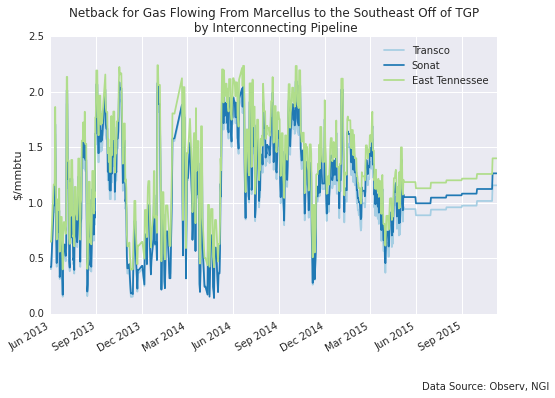

In [181]:
title = 'Netback for Gas Flowing From Marcellus to the Southeast Off of TGP \n by Interconnecting Pipeline'
df_compile.plot(kind = 'line', title = title )
plt.gca().set_ylabel('$/mmbtu')
plt.figtext(0.99, 0.01, 'Data Source: Observ, NGI', horizontalalignment='right') 
plt.savefig('/Users/wei/Dropbox/Observ/Blog/TGP_netbacks.png')

In [50]:
df_variable.head()

,receipt,cmd1,fuel1,land1,cmd2,fuel2,land2,delivery,variable,spread,netbacks
2013-06-01,3.08,0.1809,0.0165,3.315608,0.2389,0.0176,3.618188,4.02,0.538188,0.94,0.401812
2013-06-02,3.08,0.1809,0.0165,3.315608,0.2389,0.0176,3.618188,4.02,0.538188,0.94,0.401812
2013-06-03,3.08,0.1809,0.0165,3.315608,0.2389,0.0176,3.618188,4.02,0.538188,0.94,0.401812
2013-06-08,2.32,0.1809,0.0165,2.542857,0.2389,0.0176,2.831593,3.75,0.511593,1.43,0.918407
2013-06-09,2.32,0.1809,0.0165,2.542857,0.2389,0.0176,2.831593,3.75,0.511593,1.43,0.918407


In [ ]:
        ## Pull Pipeline Flows
        pipeline_id = df_path_multiple.pipeline1[i]
        filter_list = df_path_multiple.list1[i].split(',')
        df_pipeflow1 = eval(df_path_multiple.flow_query1[i])
        df_pipeflow1.columns = ['date','pipeline_flow1']

        pipeline_id = df_path_multiple.pipeline2[i]
        filter_list = df_path_multiple.list2[i].split(',')
        df_pipeflow2 = eval(df_path_multiple.flow_query2[i])
        df_pipeflow2.columns = ['date','pipeline_flow2']
        df_pipeflow = df_pipeflow1.set_index('date').join(df_pipeflow2.set_index('date'))
        df_pipeflow['pipeline_flow'] = df_pipeflow.apply(lambda x : x['pipeline_flow1'] if x['pipeline_flow1'] >= x['pipeline_flow2'] else x['pipeline_flow2'], axis=1)

In [42]:
        ##remove outlier
        spread_mean = df_variable['spread'].mean()
        netback_mean = df_variable['netbacks'].mean()
        spread_std = df_variable['spread'].std()
        netback_std = df_variable['netbacks'].std()

        coeff = 1.5
        netback_std_high = netback_mean + coeff*netback_std
        netback_std_low = netback_mean - coeff*netback_std
        spread_std_high = spread_mean + coeff*spread_std
        spread_std_low = spread_mean - coeff*spread_std

In [43]:
        if netback_mean!=0 and spread_mean!=0:
            df_variable = df_variable[df_variable['netbacks']<netback_std_high]
            df_variable = df_variable[df_variable['netbacks']>netback_std_low]
            df_variable = df_variable[df_variable['spread']<spread_std_high]
            df_variable = df_variable[df_variable['spread']>spread_std_low]

In [44]:
        df_plot = df_variable.join(df_pipeflow)

        ## set y-limit
        y_limit_high = spread_std_high
        if netback_std_high > spread_std_high:
            y_limit_high = netback_std_high
        y_limit_low = spread_std_low
        if netback_std_low < spread_std_low:
            y_limit_low = netback_std_low

NameError: name 'df_pipeflow' is not defined

In [ ]:
        ## set x-limit
        x_limit_high = df_variable['netbacks'].max()+0.1
        x_limit_low = df_variable['netbacks'].min()-0.1

        ## Plot Netbacks against pipeline flows
        title = 'Netback vs pipeline flow from '+ df_path_multiple.rec_group[i] + ' to ' \
                        +df_path_multiple.del_group[i]+' via '+df_path_multiple.pipe_name1[i]+' and '+df_path_multiple.pipe_name2[i]
        plot_scatter('pipeline_flow', 'netbacks',str(path_id)+'a.png',path_id,df_plot, title)

In [46]:
        ## Plot netbacks and current spreads
        title = 'Netback vs market spreads from '+ df_path_multiple.rec_group[i] + ' to ' \
                        +df_path_multiple.del_group[i]+' via '+df_path_multiple.pipe_name1[i]+' and '+df_path_multiple.pipe_name2[i]
        matplotlib.plot_line('pipeline_flow', 'netbacks',str(path_id)+'a.png',path_id,df_plot, title,y_limit_high,y_limit_low)

NameError: name 'matplotlib' is not defined

In [29]:
        df_display = df_variable[df_variable.index.isin(target_date)].loc[:,('variable','spread','netbacks')]

        df_display['date'] = df_display.index
        print df_display
        return df_display

In [26]:
from datetime import datetime
from datetime import date

In [39]:
query_rate = "SELECT * FROM transportdev.rate"
df_rate = pd.read_sql(query_rate, db)

# Set relevant dates
start_date = '2013-05-05'
prompt_month = datetime.today().strftime('%Y-%m-%d')
sixth_month = (datetime.today() + pd.DateOffset(months=6)).strftime('%Y-%m-%d')
current_month = date(datetime.today().year, datetime.today().month, 1)
target_date = pd.date_range(current_month, periods=6, freq='M').shift(1, freq=pd.datetools.day).tolist()
target_date2 = pd.date_range(end = (datetime.today()-pd.DateOffset(days=1)).strftime('%Y-%m-%d') , periods=3, freq='D')
target_date.extend(target_date2)

In [316]:
from datetime import datetime
from datetime import date
import MySQLdb
import numpy as np
import matplotlib
# Force matplotlib to not use any Xwindows backend.
matplotlib.use('Agg')

import matplotlib.pyplot as plt
import os
import pandas as pd
import pyodbc
from sqlalchemy import create_engine
from textwrap import wrap
import seaborn as sns
import transport as t

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [208]:




SELECT  t1.pipeline, t1.zone as start_zone, t2.zone as end_zone, t1.facility_type, t2.facility_type, t1.rate_schedule,
t1.state as start_state, t2.state as end_state, LEAST(t1.location_transport_mmbtu, t2.location_transport_mmbtu) as mmbtu,
t1.location as start_location, t2.location as end_location, t1.shipper, t2.interconnect_entity, t1.effective_date, t2.expiration
FROM transportdev.ioc t1 JOIN transportdev.ioc t2
WHERE t1.contract_number = t2.contract_number
AND t1.QTI = 'M2'
AND t2.QTI = 'MQ'
AND t1.contract_quarter = '2015-01-01'
AND t1.pipeline = 'Tennessee Gas Pipeline'
AND t1.zone like 'ZONE 4'
AND t2.zone like 'ZONE 1'
GROUP BY 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
ORDER BY 2,3

,path_id1,path_id2,rec_price_id,del_price_id,rec_group,del_group,pipeline1,pipeline2,pipe_name1,pipe_name2,flow_query1,flow_query2,list1,list2
0,4,5,77,51,AECO,Bakken,251,802,Alberta,Foothills_bc,"t.getflow_by_points(start_date, filter_list)","t.getflow_by_points(start_date, filter_list)",405640,428829
1,14,23,14,71,Rockies,Ventura,562,412,Bison,NBPL,"t.getflow_by_points(start_date, filter_list)","t.getflow_by_points(start_date, filter_list)",421761,421758
2,19,24,12,13,Rockies,Chicago,373,406,TIGT (KMIGT),NGPL,"t.getflow_by_states(start_date, pipeline_id, f...","t.getflow_by_zone(start_date, pipeline_id, fil...",Nebraska,NGPL AMARILLO MAINLINE Tariff Zone
3,34,33,108,13,Lower Marcellus,Chicago,461,394,TGP,Midwestern,"t.getflow_by_points(start_date,filter_list)","t.getflow_by_points(start_date, filter_list)",424709,"82327,82411,82413"
4,40,47,55,13,Michcon,Chicago,255,399,ANR,MRT,t.getflow_path38(start_date),"t.getflow_by_states(start_date, pipeline_id, f...",,Illinois
5,56,53,77,2,AECO,New England,270,368,TransCanada,Iroquois,"t.getflow_by_points(start_date, filter_list)","t.getflow_by_points(start_date, filter_list)",407254,82504
6,95,94,77,55,AECO,Dawn,270,353,TransCanada,Great Lakes,"t.getflow_by_points(start_date, filter_list)","t.getflow_by_points(start_date, filter_list)",84021,84021
7,34,121,108,128,Lower Marcellus,Southeast,461,467,TGP,Transco,"t.getflow_by_points(start_date,filter_list)","t.getflow_by_points(start_date, filter_list)",424709,60959
8,34,122,108,128,Lower Marcellus,Southeast,461,448,TGP,Sonat,"t.getflow_by_points(start_date,filter_list)","t.getflow_by_points(start_date, filter_list)",424709,62431
9,34,123,108,128,Lower Marcellus,Southeast,461,312,TGP,East Tennessee,"t.getflow_by_points(start_date,filter_list)","t.getflow_by_points(start_date, filter_list)",424709,"62298,62155"


In [298]:
# Pull Relevant IOC data
server = "eia.cwvrtrnm3ga3.us-west-2.rds.amazonaws.com"
db = MySQLdb.connect(server,"observ","forecast123","forecastdev" )

query_ioc = (
    "SELECT  t1.pipeline, t1.zone as start_zone, t2.zone as end_zone, t1.facility_type, "
    "t2.facility_type, t1.rate_schedule, "
    "t1.state as start_state, t2.state as end_state, LEAST(t1.location_transport_mmbtu, "
    "t2.location_transport_mmbtu) as mmbtu, "
    "t1.location as start_location, t2.location as end_location, t1.shipper, "
    "t2.interconnect_entity, t1.effective_date, t2.expiration "
    "FROM transportdev.ioc t1 JOIN transportdev.ioc t2 "
    "WHERE t1.contract_number = t2.contract_number "
    "AND t1.QTI = 'M2' "
    "AND t2.QTI = 'MQ' "
    "AND t1.contract_quarter = '2015-01-01' "
    "AND t1.pipeline = 'Tennessee Gas Pipeline' "
    "AND t1.zone like 'ZONE 4' "
    "AND t2.zone like 'ZONE 1' "
    "GROUP BY 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15 "
    "ORDER BY 2,3 "
    )
df_ioc = pd.read_sql(query_ioc, db)

In [303]:
## Overwrite bad data
df_ioc.loc[df_ioc.end_location == 'MIDWSTRNTGPMGTSMSSUMNER', 'interconnect_entity'] = 'Midwestern GT'
df_ioc.loc[df_ioc.interconnect_entity == '', 'interconnect_entity'] = 'Other'
df_ioc.loc[df_ioc.interconnect_entity == 'TENNESSEE VALLEY AUTHORITY ', 'interconnect_entity'] = 'TVA'
df_ioc.loc[df_ioc.interconnect_entity == 'EAST TENNESSEE NATURAL GAS LLC ', 'interconnect_entity'] = 'East Tenn'
df_ioc.loc[df_ioc.interconnect_entity == 'Transcontinental Gas Pipe Line Company LLC.', 'interconnect_entity'] = 'Transco'
df_ioc.loc[df_ioc.interconnect_entity == 'Piedmont Natural Gas Company Inc.', 'interconnect_entity'] = 'Piedmont'


In [269]:
df_ioc

,pipeline,start_zone,end_zone,facility_type,facility_type,rate_schedule,start_state,end_state,mmbtu,start_location,end_location,shipper,interconnect_entity,effective_date,expiration
0,Tennessee Gas Pipeline,ZONE 4,ZONE 1,GAS PROCESSING PLANT,CITYGATE,FT-A,OH,TN,32122,KENSINGTON DEHY: RIP 214F 101.2 4,NASHVILLE TENNESSEE 2,CHESAPEAKE ENERGY MARKETING INC,Piedmont Natural Gas Company Inc.,2014-04-01,2017-09-30
1,Tennessee Gas Pipeline,ZONE 4,ZONE 1,GAS PROCESSING PLANT,INTERSTATE INTERCONNECT,FT-A,OH,MS,38750,KENSINGTON DEHY: RIP 214F 101.2 4,HEIDELBERG MISS,TOTAL GAS & POWER NORTH AMERICA INC.,Transco,2013-06-01,2028-07-31
2,Tennessee Gas Pipeline,ZONE 4,ZONE 1,GAS PROCESSING PLANT,INTERSTATE INTERCONNECT,FT-A,OH,MS,61250,KENSINGTON DEHY: RIP 214F 101.2 4,HEIDELBERG MISS,TOTAL GAS & POWER NORTH AMERICA INC.,Transco,2013-06-01,2028-07-31
3,Tennessee Gas Pipeline,ZONE 4,ZONE 1,GAS PROCESSING PLANT,INTERSTATE INTERCONNECT,FT-A,PA,MS,25000,MOUNTAIN RIDGE DEHY: RIP 316F101.1,HEIDELBERG MISS,Talisman Energy USA Inc,Transco,2009-04-01,2019-03-31
4,Tennessee Gas Pipeline,ZONE 4,ZONE 1,GAS PROCESSING PLANT,INTERSTATE INTERCONNECT,FT-A,PA,MS,25000,SHEDDEN DEHY: RIP 316D-101.1 A,HEIDELBERG MISS,Talisman Energy USA Inc,Transco,2009-04-01,2019-03-31
5,Tennessee Gas Pipeline,ZONE 4,ZONE 1,GAS PROCESSING PLANT,INTERSTATE INTERCONNECT,FT-A,PA,MS,25000,SHEDDEN II DEHY: RIP 316H 101.1I,HEIDELBERG MISS,Talisman Energy USA Inc,Transco,2009-04-01,2019-03-31
6,Tennessee Gas Pipeline,ZONE 4,ZONE 1,GAS PROCESSING PLANT,UNASSIGNED,FT-A,OH,NA,0,KENSINGTON DEHY: RIP 214F 101.2 4,MIDWSTRNTGPMGTSMSSUMNER,TOTAL GAS & POWER NORTH AMERICA INC.,Midwestern GT,2013-06-01,2028-07-31
7,Tennessee Gas Pipeline,ZONE 4,ZONE 1,GAS PROCESSING PLANT,UNASSIGNED,FT-A,OH,NA,17878,KENSINGTON DEHY: RIP 214F 101.2 4,MIDWSTRNTGPMGTSMSSUMNER,CHESAPEAKE ENERGY MARKETING INC,Midwestern GT,2014-04-01,2017-09-30
8,Tennessee Gas Pipeline,ZONE 4,ZONE 1,GAS PROCESSING PLANT,UNASSIGNED,FT-A,OH,NA,35000,KENSINGTON DEHY: RIP 214F 101.2 4,MIDWSTRNTGPMGTSMSSUMNER,TOTAL GAS & POWER NORTH AMERICA INC.,Midwestern GT,2013-11-01,2028-10-31
9,Tennessee Gas Pipeline,ZONE 4,ZONE 1,GAS PROCESSING PLANT,UNASSIGNED,FT-A,OH,NA,143750,KENSINGTON DEHY: RIP 214F 101.2 4,MIDWSTRNTGPMGTSMSSUMNER,CHESAPEAKE ENERGY MARKETING INC,Midwestern GT,2013-07-01,2028-07-31


In [304]:
df_ioc.pivot_table(index = ['interconnect_entity'], values= ['mmbtu'], aggfunc = [np.sum]).index

Index([u'East Tenn', u'Midwestern GT', u'Other', u'Piedmont', u'TVA', u'Transco'], dtype='object')

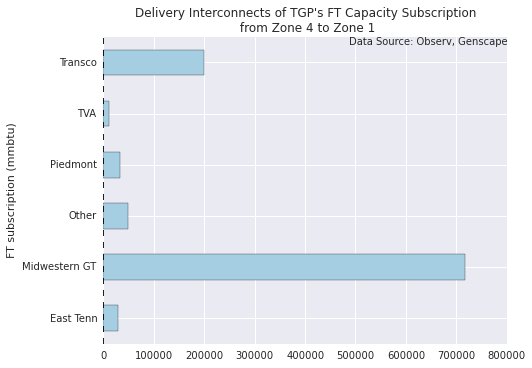

In [309]:
df_ioc_plot = df_ioc.pivot_table(index = ['interconnect_entity'], values= ['mmbtu'], aggfunc = [np.sum])
df_ioc_plot.plot(kind = 'barh', legend = False, title = "Delivery Interconnects of TGP's FT Capacity Subscription \n from Zone 4 to Zone 1")
plt.gca().set_ylabel('FT subscription (mmbtu)')
plt.gcf().subplots_adjust(left=0.20)
plt.figtext(0.9, 0.88, 'Data Source: Observ, Genscape', horizontalalignment='right') 
plt.savefig('/Users/wei/Dropbox/Observ/Blog/TGP_ioc_interconnect.png')

In [348]:
print(df_ioc_plot.to_html(index = FALSE))

NameError: name 'FALSE' is not defined

In [7]:
# The function that pulls gas consumption by power plants in mmbtu:
def plant_eg_btu(plant_id_input):

    ## Pull Data from EIA API ##
    default_url = "http://api.eia.gov/series/?api_key=45780D1A92A4F363815C75600ACF5748&series_id="
    series_id = "ELEC.PLANT.CONS_EG_BTU."+ str(plant_id_input) +"-NG-ALL.M"
    eia_pull = pd.read_json(path_or_buf = default_url+series_id, orient = 'columns', typ = 'series')

    ## Organize EIA data into dataframes
    target = pd.DataFrame(eia_pull.series[0]['data'],columns = ['yearmonth',str(plant_id_input)] )
    df_value = pd.DataFrame(target[str(plant_id_input)])
    df_year=pd.DataFrame(target['yearmonth'].str[:4])
    df_year.columns.values[0] = 'year'
    df_month=pd.DataFrame(target['yearmonth'].str[-2:])
    df_month.columns.values[0] = 'month'
    df_month.month = df_month.month.astype(int)
    df_year_month=df_month.combine_first(df_year)
    df_target=df_year_month.combine_first(df_value)
    #print "Data for Power Plant # %.f fetched" %plant_id_input
    df_target = df_target[['year','month',str(plant_id_input)]]

    def f(x):
        return cal.monthrange(int(x[0]), int(x[1]))[1]
    df_target['daysInMonth']=df_target.apply(f, axis=1)
    df_target[str(plant_id_input)]=df_target[str(plant_id_input)]/df_target['daysInMonth']
    df_target= df_target.drop('daysInMonth', 1)

    return df_target;